# Cleaning Data

In [95]:
##Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# read excel file 
df = pd.read_excel("data/masterlistdatacopy.xlsx")

# delete rows with nan values
df.dropna(how='all', inplace=True) 

# Fill NaN values in the TASK column 
df['TASK'] = df['TASK'].interpolate(method ='pad', limit_direction ='forward')

# to find the dates in the TASK column
dates_in_task_col = df['TASK'].str.contains('---')

# to get indexes of the dates in the TASK column
get_idx = dates_in_task_col[dates_in_task_col == True].index 

# Fill NaN values by copying the dates in the TASK column to DATE column
df['DATE'] = df['TASK'].loc[get_idx].interpolate()

# Fill NaN values in the DATE column
df['DATE'] = df['DATE'].interpolate(method ='pad', limit_direction ='forward')

# delete if any row include nan values
df.dropna(how='any',axis=0, inplace=True)

##  fix typs of dates ##

# delete ' - ' s in 'DATE' columnn
df['DATE'] = df['DATE'].str.strip(' - ')
# delete unnecessary emojies
df['TASK'] = df['TASK'].str.strip(' 📖|📈|📚|✍️|👂|🗣')
# **** #

# find values containing'2022' in DATE column
findY = df['DATE'].str.contains('2022')

# get indexes that are not containing'2022'
getFalse = findY[findY == False].index

# format dates
a = pd.to_datetime(df['DATE'].loc[getFalse], format='%d %B %a')+ pd.offsets.DateOffset(years=123) # this is because formating returns years as 1900 so it adds 123 years to the default value

# update data
df['DATE'].update(a)

# **** #

# get indexes containing'2022'
getTrue = findY[findY == True].index 

# format dates
b =  pd.to_datetime(df['DATE'].loc[getTrue], format='%d %b %Y %a')

# update data
df['DATE'].update(b)

# **** #

# show only dates not times
df['DATE'] = pd.to_datetime(df['DATE']).dt.date 

df.head(10)

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED
3,2023-01-22,first draft,03:00:00,15:35:00,16:00:00,25.0,✅
4,2023-01-22,first draft,02:00:00,15:10:00,15:35:00,25.0,✅
5,2023-01-22,first draft,01:00:00,14:09:00,14:46:00,25.0,✅
11,2023-01-21,web,02:00:00,01:44:00,02:04:00,19.0,❌
12,2023-01-21,web,01:00:00,01:19:00,01:44:00,25.0,✅
18,2023-01-19,Eng,01:00:00,11:02:00,13:01:00,25.0,✅
24,2023-01-18,Eng,01:00:00,17:57:00,18:03:00,6.0,❌
30,2023-01-17,Math 111,11:00:00,12:21:00,12:46:00,25.0,✅
31,2023-01-17,Math 111,10:00:00,11:56:00,12:21:00,25.0,✅
32,2023-01-17,Math 111,09:00:00,11:30:00,11:54:00,25.0,✅


In [96]:
df_copy = df.copy()

df_copy.loc[df_copy['TASK'].str.contains('Ch|ch|CH'), 'TASK'] = 'PHYS 111'
df_copy.loc[df_copy['TASK'].str.contains('153'), 'TASK'] = 'MATH 153'
df_copy.loc[df_copy['TASK'].str.contains('April|March|February|Revision|Eng'), 'TASK'] = 'ENG'
df_copy.loc[df_copy['TASK'].str.contains('Py'), 'TASK'] = 'Python'
df_copy.loc[df_copy['TASK'].str.contains('学习中文'), 'TASK'] = 'Chinese'
time_spent = df_copy.groupby(['TASK']).sum()
time_spent.sort_values(by=['TIME FOCUSED'], ascending= False).head(10)

,TIME FOCUSED
TASK,
PHYS 111,8489.0
React,7566.0
MATH 153,6653.0
firebase,6501.0
Javascript,4301.0
Math 111,3861.0
rebuidling,2701.0
ENG,2127.0
Chinese,2060.0


In [97]:
# get tasks df_copy
tasks = df_copy['TASK'].unique()
tasks

array(['first draft', 'web', 'ENG', 'Math 111', 'Python', 'MATH 115',
       'Programming', 'MATH 153', 'PHYS 111', 'SAP', 'Drone simulation',
       'Stateflow', 'Simulink', 'MathWorks', 'MATLAB Onramp', 'program',
       'lesson student', 'CS885', 'violin', 'General', 'Violin Course',
       'Page reload case', 'kurs', 'Chinese', 'odtü', 'numberga.me',
       'Reading', 'rebuidling', 'firebase', 'Local storage', 'React',
       'calendar', 'A weird problem ..', 'Router', 'Documantation',
       'Bootstrap', 'english', 'Web- notion  Design', 'NoSql',
       'Niyet mektubu', 'Writing hasan abi', 'data types and algorithms',
       'B & C', 'Game css', 'last day bc', 'Medium',
       'How I learn languages', 'Week 1', 'kuran', 'Javascript',
       'Writing', 'dkn', 'create note pj', 'Data analysis', 'Excel',
       'Numpy', 'HTML, CSS, Flexbox & Bootstrap', 'Figma',
       'Learn  HTML & CSS', 'Read news', 'Tree', 'Math problem',
       'Personal statement', 'Study Reading', 'Study Writ

In [98]:
# get the tasks just 'MATH 153' MATH 111  and ENG on the df_copy
prev_term = df_copy[df_copy['TASK'].isin(['MATH 153', 'PHYS 111', 'ENG', 'Math 111', 'MATH 115'])]
# drop NUMBER	START	END COMPLETED	CHECKLIST columns
prev_term.drop(['NUMBER', 'START', 'END', 'COMPLETED'], axis=1, inplace=True)
# UPDATE this prev_term to csv file
prev_term.to_csv('data/prev_term.csv', index=False)

/Users/zehrakaya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
checklist = pd.Series(['MATH', 'PHYS','IELTS','English',
               'Drone Simulation','Habbits & Hobbies',
               '中国','game - JavaScript','College Admission', 
               'Chess-Like Game', 'Python Programming','Volunteer Works'])
checklist

0                   MATH
1                   PHYS
2                  IELTS
3                English
4       Drone Simulation
5      Habbits & Hobbies
6                     中国
7      game - JavaScript
8      College Admission
9        Chess-Like Game
10    Python Programming
11       Volunteer Works
dtype: object

In [100]:
df_copy['CHECKLIST'] = np.nan
df_copy

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED,CHECKLIST
3,2023-01-22,first draft,03:00:00,15:35:00,16:00:00,25.0,✅,NaN
4,2023-01-22,first draft,02:00:00,15:10:00,15:35:00,25.0,✅,NaN
5,2023-01-22,first draft,01:00:00,14:09:00,14:46:00,25.0,✅,NaN
11,2023-01-21,web,02:00:00,01:44:00,02:04:00,19.0,❌,NaN
12,2023-01-21,web,01:00:00,01:19:00,01:44:00,25.0,✅,NaN
...,...,...,...,...,...,...,...,...
6408,2022-02-28,PHYS 111,05:00:00,08:28:00,08:53:00,25.0,✅,NaN
6412,2022-02-28,Workshop,04:00:00,06:43:00,07:08:00,25.0,✅,NaN
6416,2022-02-28,IELTS,03:00:00,05:42:00,06:07:00,25.0,✅,NaN
6417,2022-02-28,IELTS,02:00:00,05:05:00,05:30:00,25.0,✅,NaN


In [101]:
df_copy.loc[df_copy['TASK'].str.contains('Py|Numpy|Academy'), 'CHECKLIST'] = checklist[10]


In [102]:
data = df_copy[['TIME FOCUSED', 'TASK', 'DATE']].copy()

# convert the DATE column to Timestamp objects
data['DATE'] = pd.to_datetime(data['DATE'],format='%Y %m %d ')

# Filter the dataframe by the desired date range
start_date = pd.Timestamp(input(str("type the start date like 2022-11-10 this format: "))or '2022-02-28')
end_date = pd.Timestamp(input(str("type the end date like 2023-01-10 this format: "))or '2023-01-22')
data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]
strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')

In [103]:
data

,TIME FOCUSED,TASK,DATE
3,25.0,first draft,2023-01-22
4,25.0,first draft,2023-01-22
5,25.0,first draft,2023-01-22
11,19.0,web,2023-01-21
12,25.0,web,2023-01-21
...,...,...,...
6408,25.0,PHYS 111,2022-02-28
6412,25.0,Workshop,2022-02-28
6416,25.0,IELTS,2022-02-28
6417,25.0,IELTS,2022-02-28


# Pie Chart 

## Create Data for Pie Chart 

In [104]:
pie_df = data
# Group the data by task and sum the time focused
pie_df = pie_df.groupby('TASK')['TIME FOCUSED'].sum().reset_index()
pie_df =  pie_df.sort_values(by='TIME FOCUSED',ascending= False ).reset_index().head()



In [105]:
pie_df

,index,TASK,TIME FOCUSED
0,35,PHYS 111,8489.0
1,41,React,7566.0
2,24,MATH 153,6653.0
3,68,firebase,6501.0
4,19,Javascript,4301.0


In [106]:
pie_df.describe()

,index,TIME FOCUSED
count,5.000000,5.000000
mean,37.400000,6702.000000
std,19.191144,1561.046764
min,19.000000,4301.000000
25%,24.000000,6501.000000
50%,35.000000,6653.000000
75%,41.000000,7566.000000
max,68.000000,8489.000000


## Seaborn & matplotlib.pyplot codes

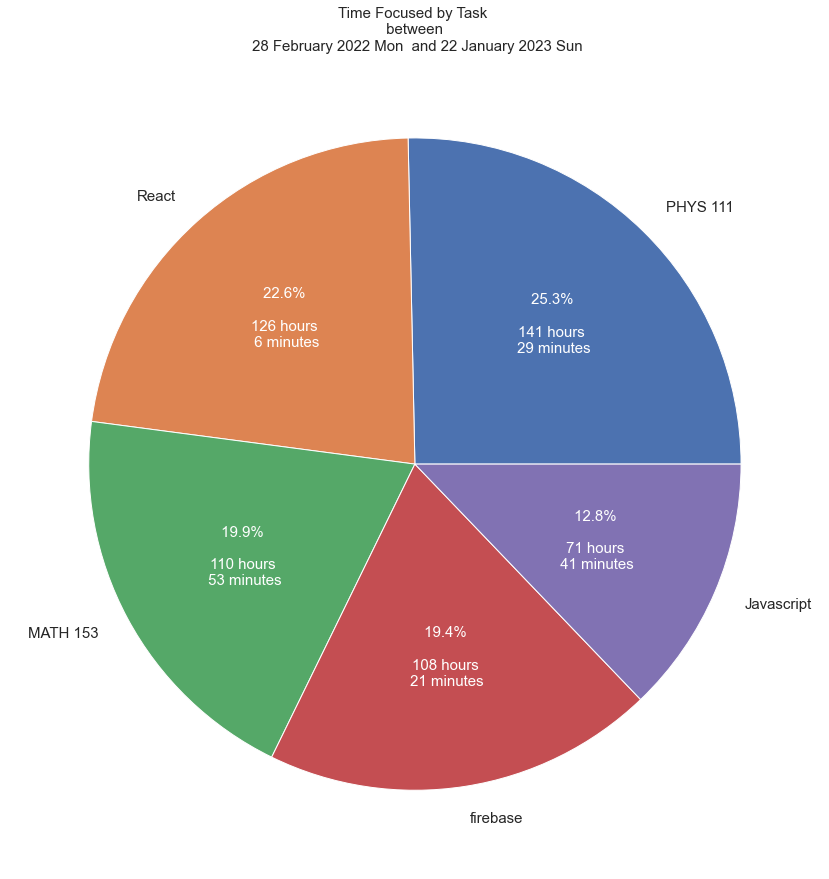

In [107]:
# create the pie chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autopct = ax.pie(pie_df['TIME FOCUSED'], 
                                 labels=pie_df['TASK'], 
                                 autopct='', 
                                 textprops={'fontsize': 15})

plt.setp(autopct, color='white', fontsize=15)

# add percentage and sum values to labels
sums = pie_df['TIME FOCUSED'].sum()
for index, row in pie_df.iterrows():
    task_time = row['TIME FOCUSED']
    task_label = row['TASK']
    label = autopct[index]
    label.set_text(f" {(task_time/sums)*100:.1f}% \n\n{int(task_time//60)} hours\n {int(task_time%60)} minutes")

strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')
ax.set_title(f"Time Focused by Task \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)


plt.show()

# Time focused by date 

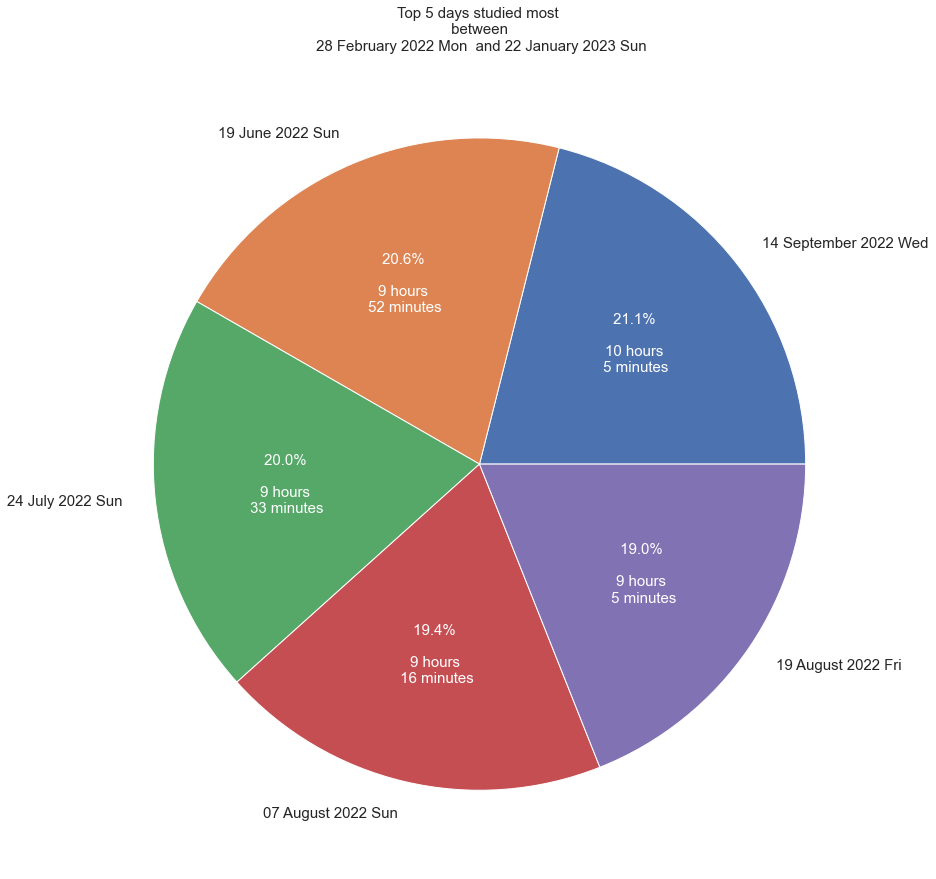

In [108]:
sort_date = data
# Group the data by task and sum the time focused
sort_date = sort_date.groupby('DATE')['TIME FOCUSED'].sum().reset_index()
sort_date =  sort_date.sort_values(by='TIME FOCUSED',ascending= False ).reset_index().head()
# sort the dataframe by Time Focused in descending order


    
# create the pie chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autopct = ax.pie(sort_date['TIME FOCUSED'], 
                                 labels=sort_date['DATE'].dt.strftime('%d %B %Y %a') , 
                                 autopct='', 
                                 textprops={'fontsize': 15})

plt.setp(autopct, color='white', fontsize=15)

# add percentage and sum values to labels
sums = sort_date['TIME FOCUSED'].sum()
for index, row in sort_date.iterrows():
    task_time = row['TIME FOCUSED']
    task_label = row['DATE']
    label = autopct[index]
    label.set_text(f" {(task_time/sums)*100:.1f}% \n\n{int(task_time//60)} hours\n {int(task_time%60)} minutes")

strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')
ax.set_title(f"Top 5 days studied most \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)


plt.show()

In [109]:
# show the dates in the 'data' which are the sort_date with loc
data.loc[data['DATE'].isin(sort_date['DATE'])].groupby(['DATE','TASK'])['TIME FOCUSED'].sum().reset_index()
new_data= df_copy
new_data['DATE']= pd.to_datetime(new_data['DATE'],format='%Y %m %d ')
new_data.loc[new_data['DATE'].isin(sort_date['DATE'])].groupby(['DATE','TASK'])['TIME FOCUSED'].sum().reset_index()
# show 'START' and 'END'in this groupby
new_data.loc[new_data['DATE'].isin(sort_date['DATE'])].groupby(['DATE','TASK','START','END'])['TIME FOCUSED'].sum().reset_index().tail(60)

,DATE,TASK,START,END,TIME FOCUSED
62,2022-08-07,React,07:29:00,09:39:00,6.0
63,2022-08-07,React,09:39:00,10:04:00,25.0
64,2022-08-07,React,11:40:00,12:05:00,25.0
65,2022-08-07,React,12:09:00,12:34:00,25.0
66,2022-08-07,React,12:50:00,13:58:00,25.0
67,2022-08-07,React,17:16:00,17:41:00,25.0
68,2022-08-07,React,17:41:00,18:15:00,25.0
69,2022-08-07,React,18:25:00,18:51:00,25.0
70,2022-08-07,React,18:51:00,19:16:00,25.0
71,2022-08-07,React,19:21:00,19:46:00,25.0


### MultiIndex

In [110]:
grpdf = data
grpdf = grpdf.groupby(['DATE','TASK'])['TIME FOCUSED'].sum().reset_index()

dates = grpdf['DATE']
tasks = grpdf['TASK']
times = grpdf['TIME FOCUSED'].values

arrays= [
    dates.to_numpy(),
    tasks.to_numpy(),
        ]
index = pd.MultiIndex.from_arrays(arrays,
                                  names=["date","task"])
dtf = pd.Series(times,index=index)
grpdf


,DATE,TASK,TIME FOCUSED
0,2022-02-28,IELTS,114.0
1,2022-02-28,PHYS 111,25.0
2,2022-02-28,Study Reading,60.0
3,2022-02-28,Study Writing Task 1,15.0
4,2022-02-28,Study Writing Task 2,85.0
...,...,...,...
762,2023-01-17,Math 111,263.0
763,2023-01-18,ENG,6.0
764,2023-01-19,ENG,25.0
765,2023-01-21,web,44.0


Unstack

In [111]:
unstacked_df = dtf.unstack()

unstacked_df =unstacked_df.fillna(0)
unstacked_df




task,A weird problem ..,B & C,Bootstrap,CS885,Chinese,Data analysis,Documantation,Drone simulation,ENG,Excel,...,kuran,kurs,last day bc,lesson student,numberga.me,odtü,program,rebuidling,violin,web
date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0
2022-03-02,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0
2022-03-03,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-04,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## seaborn bar chart


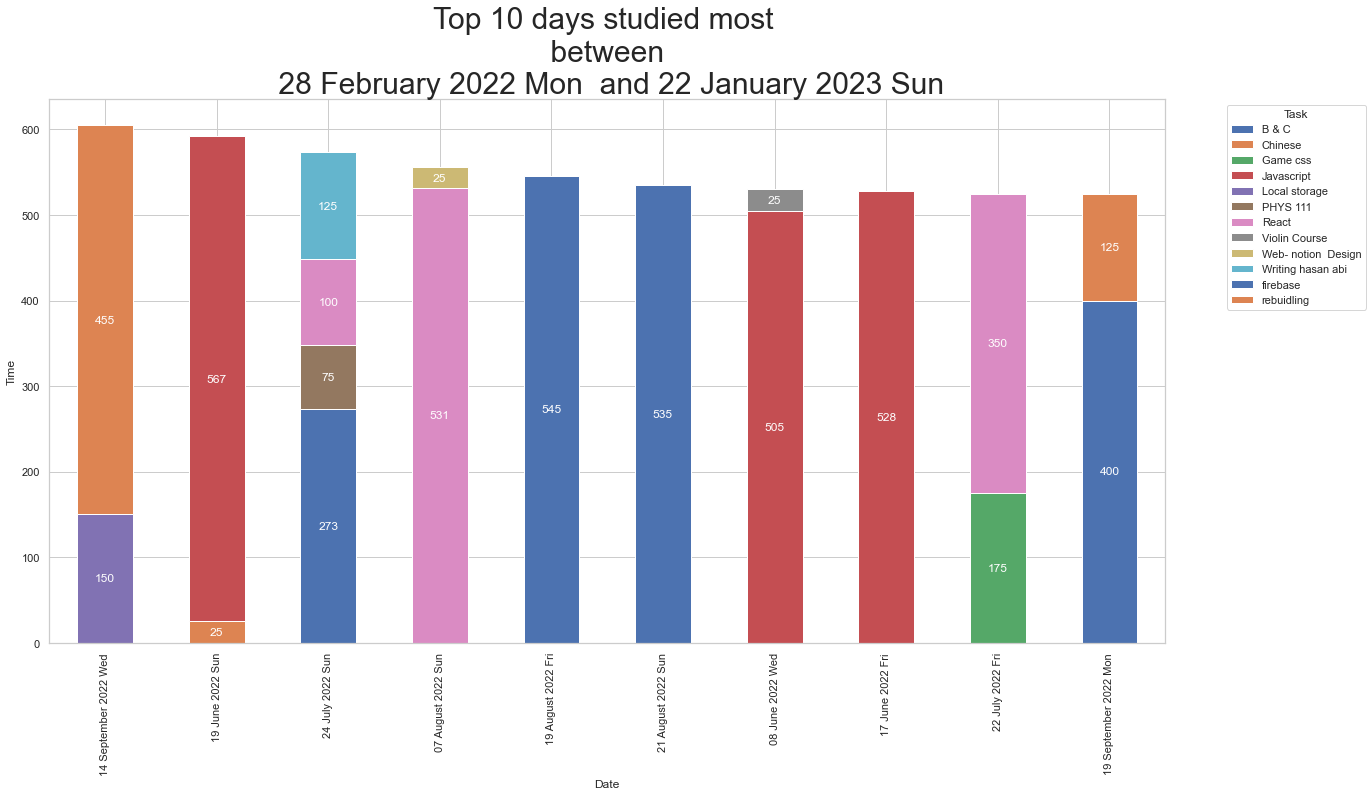

In [112]:

sns_df = unstacked_df
top_days = input() or 10

max_dates = sns_df.sum(axis=1).nlargest(top_days).index
get_max = sns_df.loc[max_dates]
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]
get_max.index = get_max.index.strftime('%d %B %Y %a')
sns.set(style='whitegrid')

ax = get_max.plot(kind='bar', stacked=True, figsize=(20, 10))
ax.set_xlabel('Date')
ax.set_ylabel('Time')
ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    value = f"{patch.get_height():.0f}"
    if patch.get_height() != 0:
        ax.text(x, y, value, ha='center', va='center', color='white')
ax.set_title(f"Top {len(max_dates)} days studied most \n between \n {strf_start_date}  and {strf_end_date}",fontsize=30)

plt.show()


add column 


In [113]:

unstacked_df['total'] =  unstacked_df.sum(axis=1)

cols = unstacked_df.columns.tolist()

cols = [cols[-1]] + cols[:-1]
unstacked_df = unstacked_df[cols]
unstacked_df.head(30)
unstacked_df = unstacked_df.groupby(['total time'],
                                  level='date').sum()
unstacked_df= unstacked_df.sort_values(by='total',
                                       ascending= False ).reset_index().head(5)
unstacked_df

task,date,total,A weird problem ..,B & C,Bootstrap,CS885,Chinese,Data analysis,Documantation,Drone simulation,...,kuran,kurs,last day bc,lesson student,numberga.me,odtü,program,rebuidling,violin,web
0,2022-09-14,605.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.0,0.0,0.0
1,2022-06-19,592.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-24,573.0,0.0,273.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-08-07,556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-08-19,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## classifying by day name 


In [114]:
days_df = data 
days_df['DATE'] = days_df['DATE'].dt.day_name()


In [115]:
days_df= days_df.groupby(['DATE','TASK'])['TIME FOCUSED'].sum()

In [116]:
days_df.head(10)

DATE    TASK                          
Friday  B & C                              313.0
        Chinese                            425.0
        ENG                                175.0
        Game css                           175.0
        General                             25.0
        HTML, CSS, Flexbox & Bootstrap     125.0
        IELTS                               85.0
        Javascript                         728.0
        MATH 115                           100.0
        MATH 153                          1129.0
Name: TIME FOCUSED, dtype: float64

In [117]:
days_sns = days_df.unstack().fillna(0)

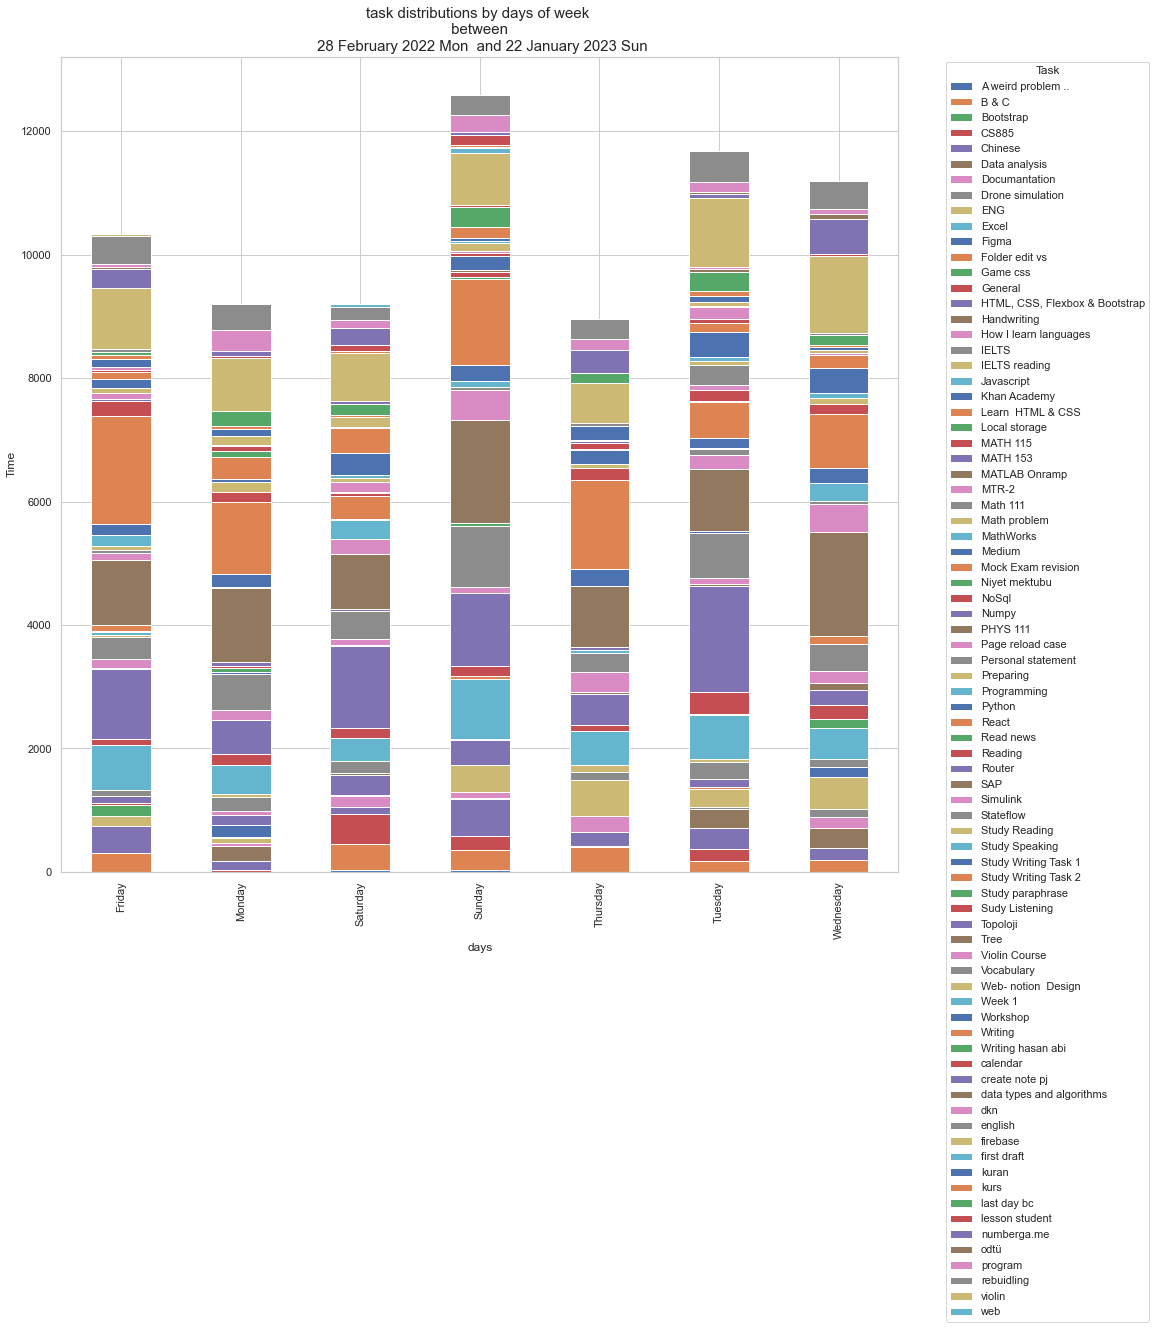

In [118]:
max_dates = days_sns.sum(axis=1).index

get_max = days_sns.loc[max_dates]

# get nonzero columns
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]
#get_max.index = get_max.index.strftime('%d %B %Y %a')

sns.set(style='whitegrid')

ax = get_max.plot(kind='bar', stacked=True, figsize=(15, 15))
ax.set_xlabel('days')
ax.set_ylabel('Time')
ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add values on each bar
# for patch in ax.patches:
#     x = patch.get_x() + patch.get_width() / 2
#     y = patch.get_y() + patch.get_height() / 2
#     value = f"{patch.get_height():.0f}"
#     if patch.get_height() != 0:
#         ax.text( x,y, value, ha='center', va='center', color='white')

ax.set_title(f"task distributions by days of week \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)
# Show the plot
plt.show()

In [119]:


max_dates = days_sns.sum(axis=1).index
get_max = days_sns.loc[max_dates]
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]

fig = go.Figure(data=[go.Bar(x=get_max.index, y=get_max[col], name=col) for col in get_max.columns])
fig.update_layout(barmode='stack', xaxis_title='Days', yaxis_title='Time',
                  title=f"Task distributions by days of week between {strf_start_date} and {strf_end_date}")
fig.update_layout(hovermode='x unified')
fig.show()